In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
p1 = cv2.imread('picture1.jpg',0)
p2 = cv2.imread('picture2.png',0)

In [3]:
def showPicture(pic,title):   # pic : 圖片 ; title : 標題
    plt.subplot(111)
    plt.imshow(pic, cmap = 'gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

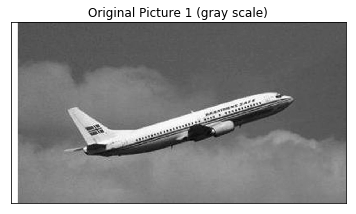

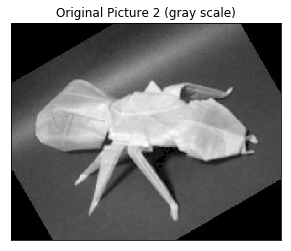

In [4]:
# show original picture

showPicture(p1,'Original Picture 1 (gray scale)')
showPicture(p2,'Original Picture 2 (gray scale)')

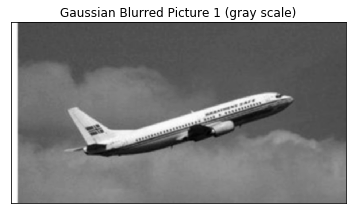

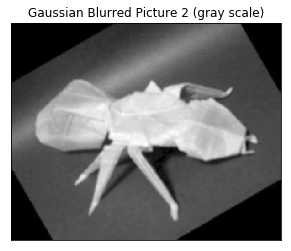

In [5]:
# show Gaussian Blurred picture   # 模糊化處理

p1_2 = cv2.GaussianBlur(p1,(9,9),0)  # 9×9的Gaussian模糊化
showPicture(p1_2,'Gaussian Blurred Picture 1 (gray scale)')

p2_2 = cv2.GaussianBlur(p2,(7,7),0)  
showPicture(p2_2,'Gaussian Blurred Picture 2 (gray scale)')

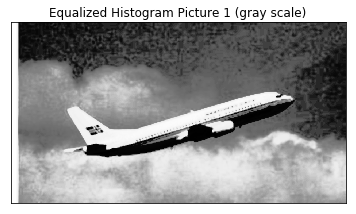

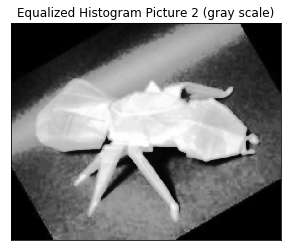

In [6]:
# show Equalized Histogram picture  # 將圖片Histograms圖形分布較平均

p1_3 = cv2.equalizeHist(p1_2)
showPicture(p1_3,'Equalized Histogram Picture 1 (gray scale)')

p2_3 = cv2.equalizeHist(p2_2)
showPicture(p2_3,'Equalized Histogram Picture 2 (gray scale)')

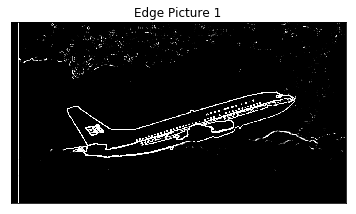

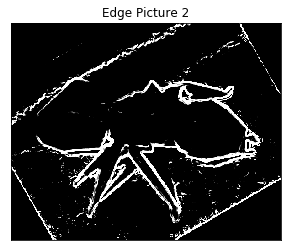

In [7]:
# show Sobel operator filtered picture  # Sobel邊緣檢測演算法

sX1 = cv2.Sobel(p1_3, cv2.CV_16S, 1, 0, ksize = 3)  # cv2.Sobel(src, ddepth, dx, dy, ksize)
sY1 = cv2.Sobel(p1_3, cv2.CV_16S, 0, 1, ksize = 3)  # ddepth:影象的深度，-1表示與原影象相同 ; dx,dy:求導的階數 ; 
                                                    # ksize:Sobel運算元的大小，必須為1、3、5、7。
                                                    # cv2.CV_16S : 16位有符號的資料型別 (Sobel函式求完導數後有負值和大於255之值)
sobelX1 = cv2.convertScaleAbs(sX1)                  # convertScaleAbs():轉回原來的uint8形式
sobelY1 = cv2.convertScaleAbs(sY1)
final_p1 = cv2.addWeighted(sobelX1, 3, sobelY1, 3, -300) # cv2.addWeighted():組合兩個方向的計算
                                                         # cv2.addWeighted(src1, alpha, src2, beta, gamma)
                                                         # alpha:權重1 ; beta:權重2 ; gamma:加到結果上的值
showPicture(final_p1,'Edge Picture 1')


sX2 = cv2.Sobel(p2_3, cv2.CV_16S, 1, 0, ksize = 3)
sY2 = cv2.Sobel(p2_3, cv2.CV_16S, 0, 1, ksize = 3)
sobelX2 = cv2.convertScaleAbs(sX2) 
sobelY2 = cv2.convertScaleAbs(sY2)
final_p2 = cv2.addWeighted(sobelX2, 6, sobelY2, 9, -500)
showPicture(final_p2,'Edge Picture 2')